In [1]:
from Engine.Tools import phiFunction, relativeAngle, distanceCalc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from itertools import product
import numpy as np
import random

In [2]:
# Simulation setup
random.seed(123)
N: int = 1000                                                          # Simulation size
Lag: int = 1                                                           # Lag value in the model
Phi: float = 0.35
Rho: float = 0.5
timeInterval: int = 1
meanPol: float = 10.0

In [3]:
# Geographical setup
GridSize: list = [x for x in range(-1, 2)]                                           # Size of the geographical grid for the simulation
Distance: float = 10.0                                                               # in Km
Location: dict = {i: x for i, x in enumerate(list(product(GridSize, repeat=2)))}     # Dictionary of coordinates for each integer-valued intersection point in the grid

In [4]:
# Environmental Setup
# windSpeed: np.ndarray = np.clip(np.random.normal(loc=30.0, scale=10.0, size=[N]), 1.0, np.inf)               # Random non-negative wind speed
windSpeed: np.ndarray = np.ones(shape=N) * 20

In [5]:
# windDirection: np.ndarray = np.degrees(np.arccos(np.cos(np.linspace(0, 2 * np.pi, N, endpoint=False))))    # Sequential wind direction 
windDirection: np.ndarray = np.random.uniform(low=0, high=360, size=[N])                                   # Random wind direction 

In [6]:
# Simulating variables
K: int = len(GridSize) ** 2
initialPollution: float = np.random.normal(loc=50, scale=2.5, size=[1, K])    

# Computing the Phi function values
W: np.ndarray = np.zeros((N, K, K))
for k in range(N):
    for pair in product(list(Location.keys()), repeat=2):
        i, j = pair
        W[k, i, j] = 0 if i == j else phiFunction(
            phi=Phi,
            rho=Rho,
            distance=distanceCalc(coordinateA=Location[i], coordinateB=Location[j], unit=Distance),
            n=timeInterval,
            velocity=windSpeed[k],
            angle=relativeAngle(coordinateA=Location[i], coordinateB=Location[j], windDir=windDirection[k]),
            lag=Lag
        )

In [7]:
# Random initial pollution level
Y: np.ndarray = np.zeros([N, K])
Y[0, :] = meanPol + initialPollution
for i in range(1, N):
    Y[i, :] = meanPol + W[i, :, :] @ Y[i-1, :].transpose() + np.random.normal(loc=0, scale=1, size=[1, K])

In [8]:
Y

array([[59.75085114, 65.38066128, 63.23066306, ..., 60.78460849,
        58.034905  , 59.21059309],
       [ 8.71828245, 11.42729194,  9.96677532, ..., 10.93949193,
        17.16171127,  9.28325157],
       [13.37932128, 16.31708711, 13.11090885, ..., 18.9597347 ,
        20.33878423, 18.6525492 ],
       ...,
       [11.30118592, 16.11438289, 10.56967545, ...,  9.30997225,
        10.12167366,  9.84093438],
       [19.24900624, 16.31613558, 18.77739727, ..., 23.2884132 ,
        21.46991181, 20.89599061],
       [ 8.86741191,  8.28659144,  7.99567874, ...,  9.35325368,
        11.1574257 , 11.07613463]])

/var/folders/7f/x1mp2wjd10vcy_krqb5_kwjc0000gn/T/ipykernel_33338/2062200356.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


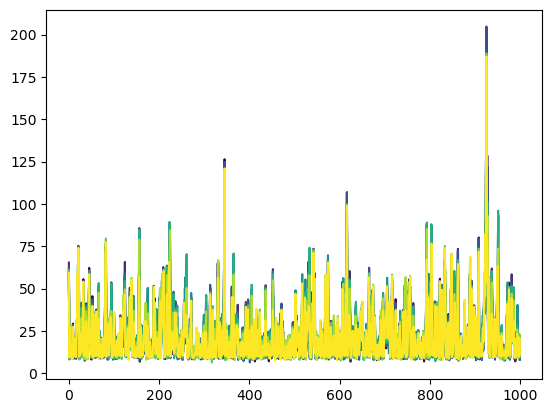

In [9]:
fig, ax = plt.subplots()
# Get a color map
cmap = cm.get_cmap('viridis')
# Generate colors from the color map
colors = [cmap(i) for i in np.linspace(0, 1, Y.shape[1])]
# Plot each column with a unique color
for i in range(Y.shape[1]):
    ax.plot(Y[:, i], color=colors[i])
plt.show()